In [83]:
import risk
import numpy as np
import os
import subprocess 
reload(risk)
%matplotlib inline

# Risk Analysis 

This document describes some analysis of risk, the popular board game. We will implement some genetic algorithms on variants of the game to learn some interesting lessons. 

# Simple Starting Point 

Fully simulating the game of risk in a meaningful way is hard. To get started we consider a subset of the game. 

> You get to choose half of the tiles on the risk board. Which tiles do you pick? 

To compare allocations we keep track of the number of armies you would get with the allocation and the number of countries you will need to defend. 

In [65]:
a = risk.Allocation([risk.Region('siam')])
b = risk.Allocation([risk.Region('siam'), risk.Region('alberta')])

<module 'matplotlib.pyplot' from '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.pyc'>

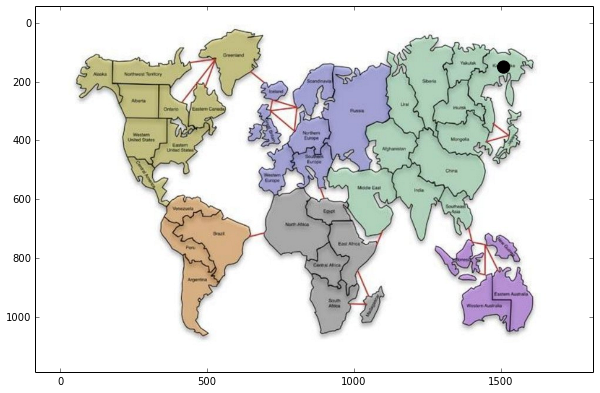

In [66]:
risk.Allocation(sample=1).plot()

In [81]:
?fig.savefig

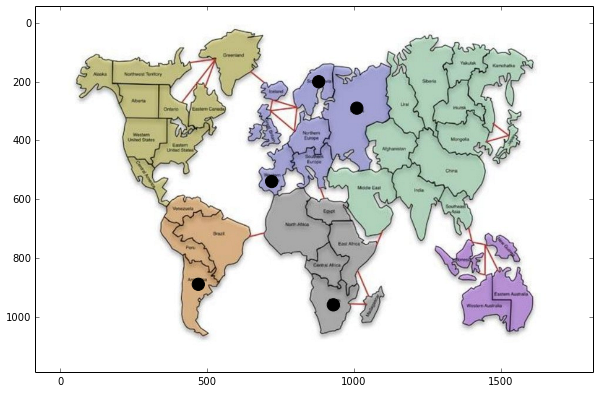

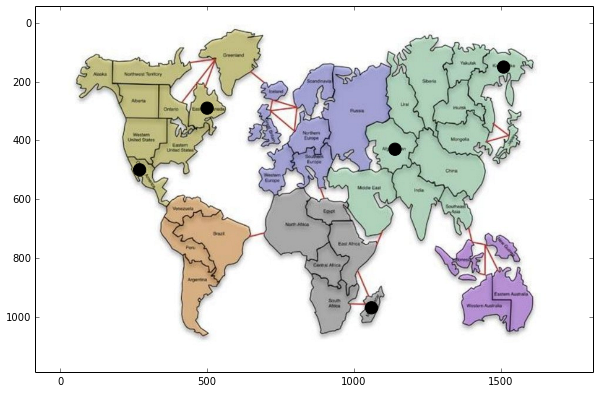

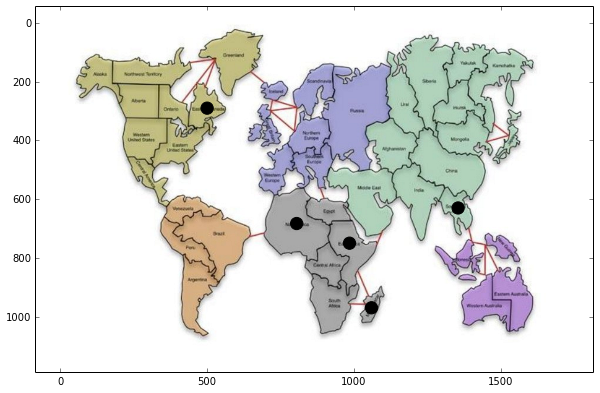

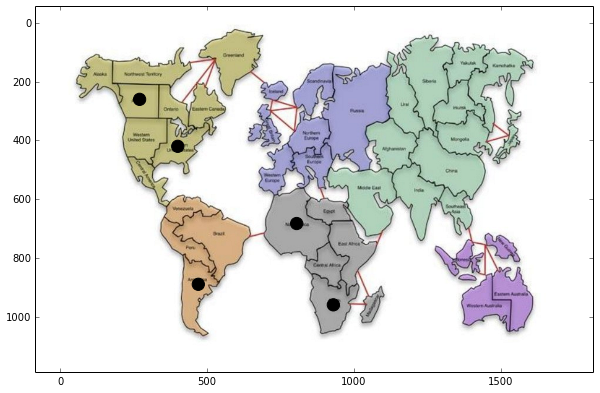

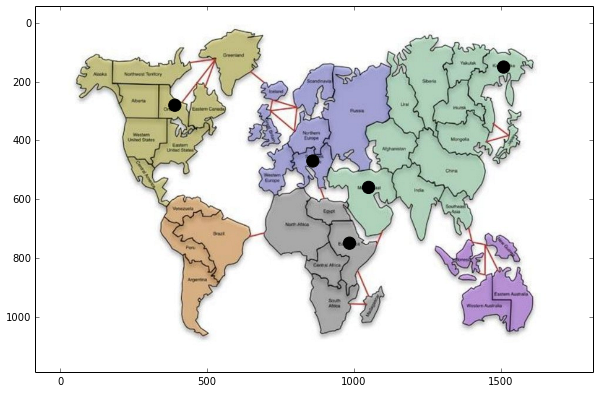

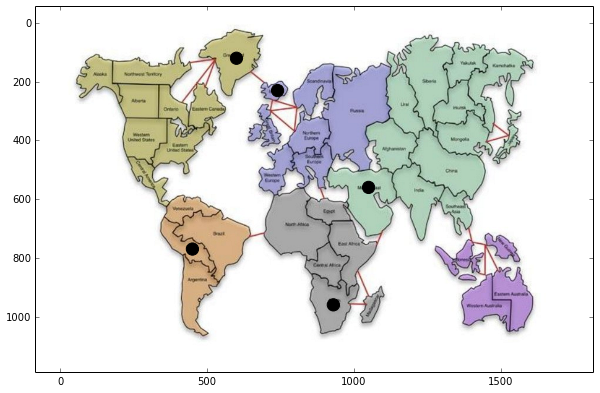

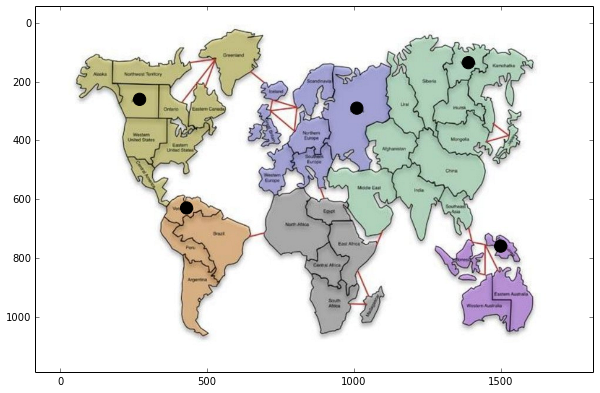

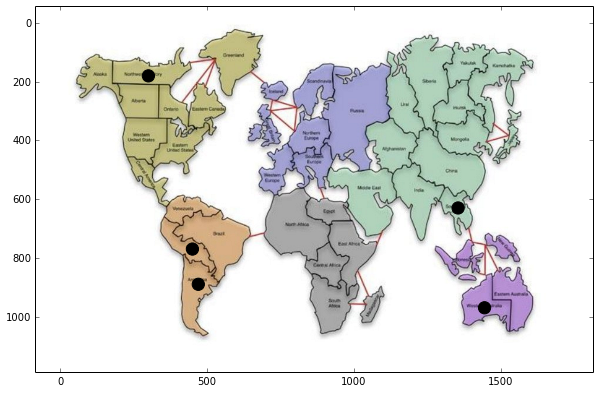

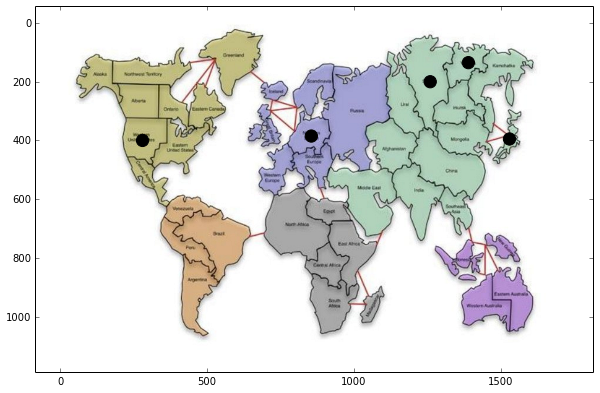

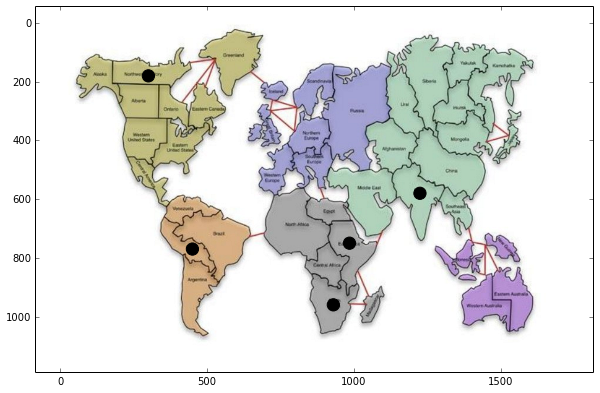

In [82]:
for i in range(10):
    fig = risk.Allocation(sample=5).plot()
    fig.savefig('./img/' + str(i) + '.png', bbox_inches='tight')

In [87]:
command = 'convert -delay 100 -loop 0 ' + os.getcwd() + '/img/*.png anim.gif'
print command
subprocess.check_output(['bash','-c', command])

convert -delay 100 -loop 0 /Users/code/Development/risk-analysis/img/*.png anim.gif


''

You can now open the `anim.gif` which should contain the gif of different game board states. 

In [116]:
def states_to_gif(states, gif_name = 'anim'): 
    img_folder = os.getcwd() + '/img'
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)
    for i, state in enumerate(states):
        state.plot().savefig('./img/' + str(i).zfill(4) + '.png', bbox_inches='tight')
    command = 'convert -delay 100 -loop 0 ' + os.getcwd() + '/img/*.png ' + gif_name + '.gif'
    subprocess.check_output(['bash','-c', command])
    subprocess.check_output(['bash','-c', 'rm ' + img_folder + '/*.png'])
    print 'gif created at ' + img_folder + '/' + gif_name + '.gif' 

gif created at /Users/code/Development/risk-analysis/img/anim.gif


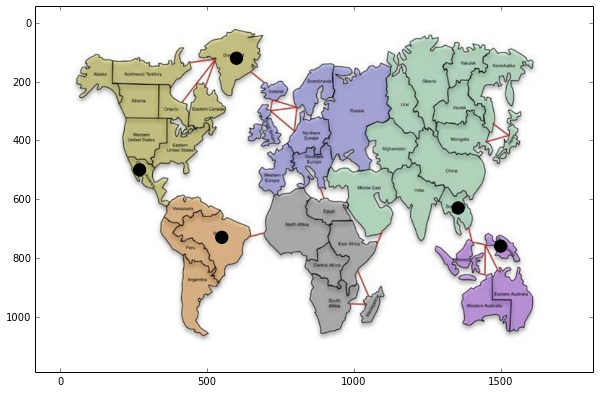

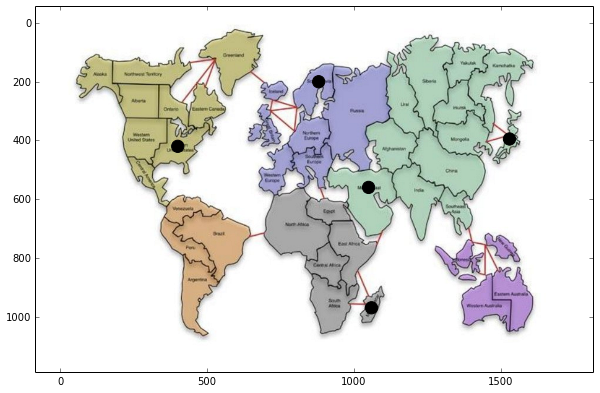

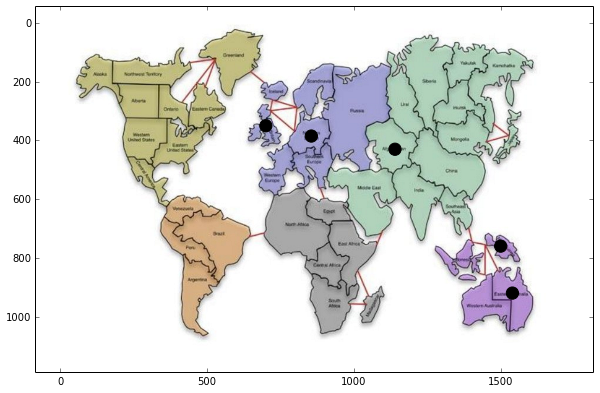

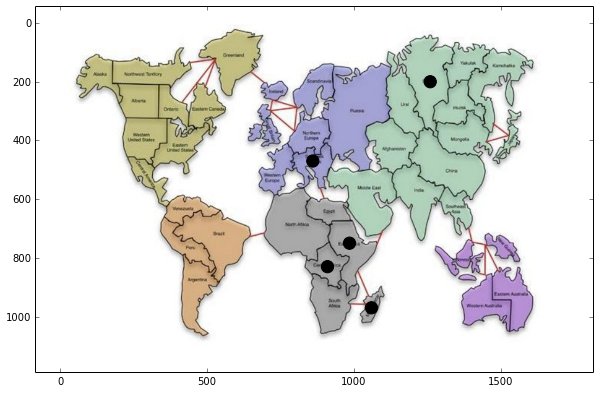

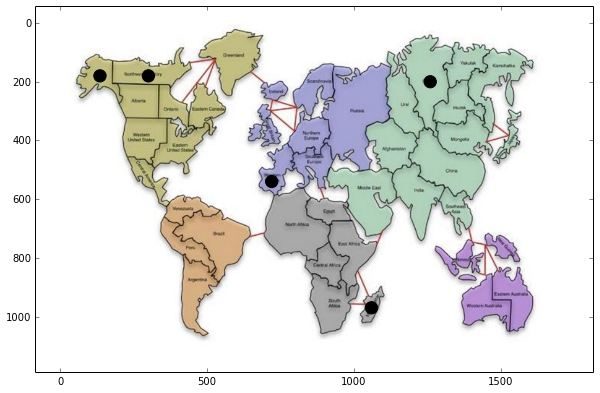

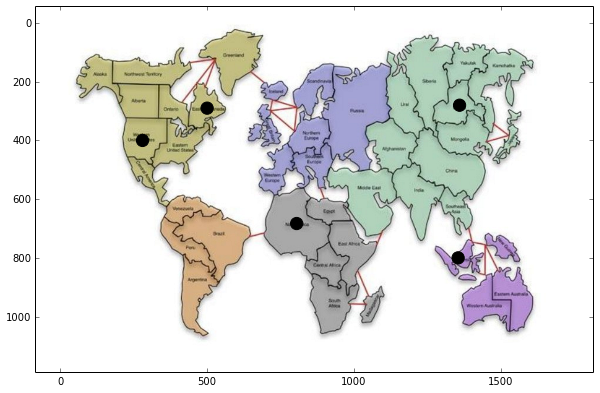

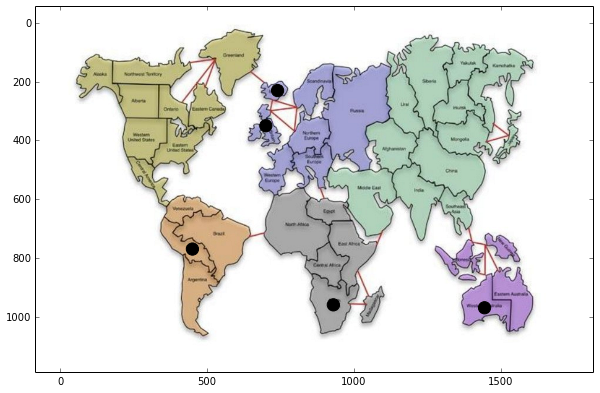

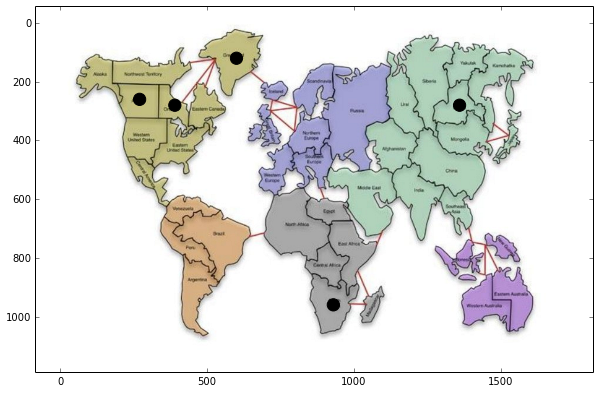

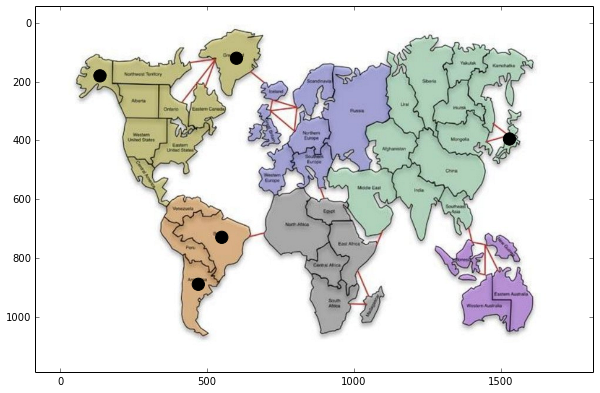

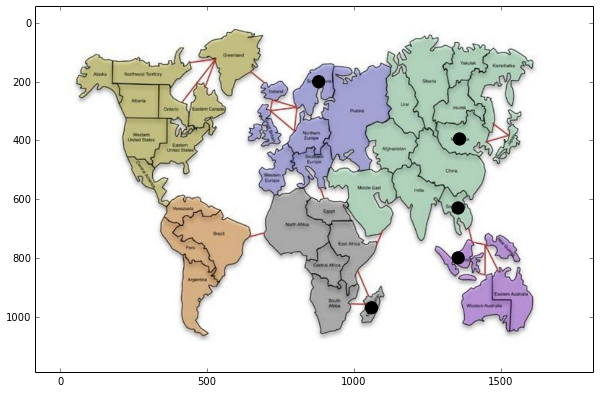

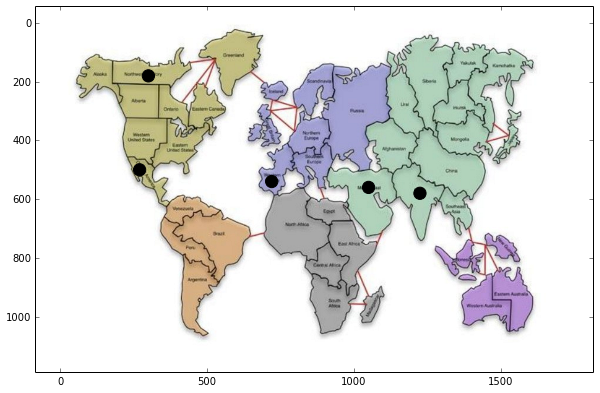

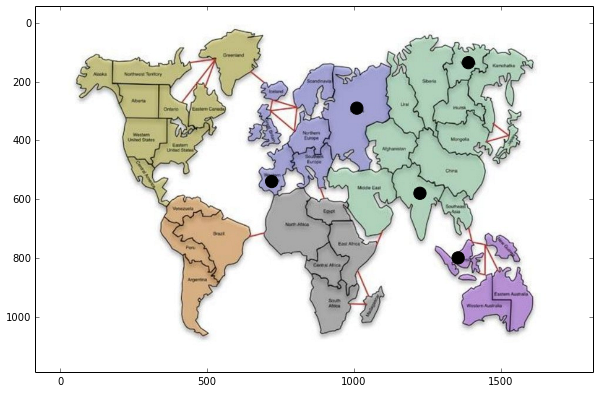

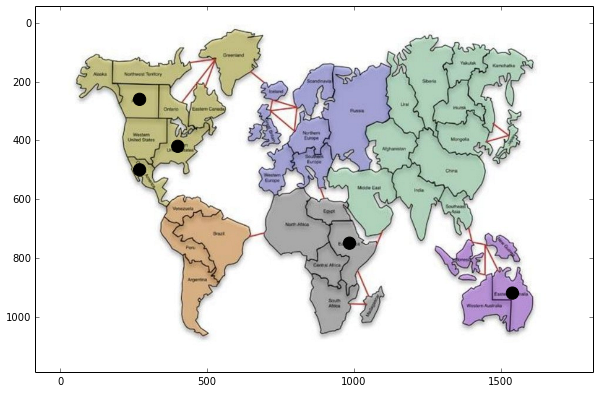

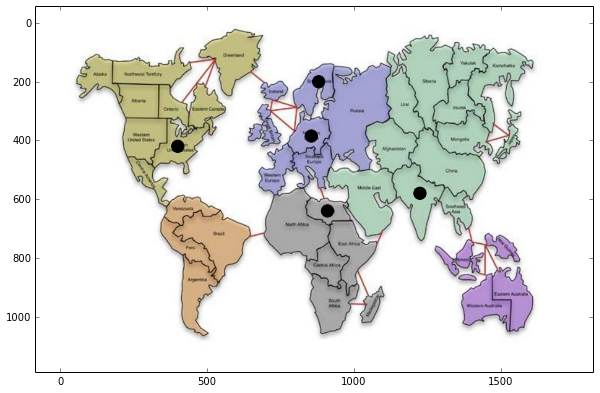

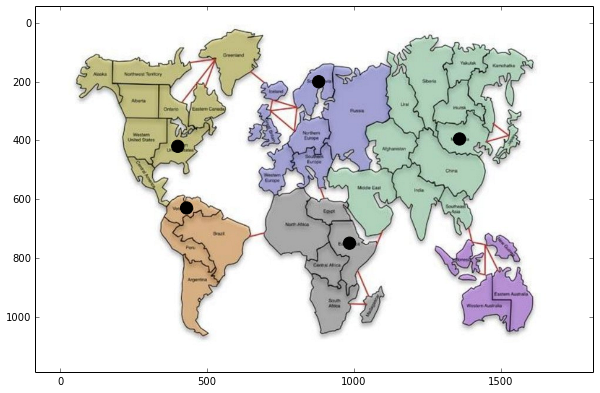

In [117]:
states_to_gif([risk.Allocation(sample = 5) for i in range(15)])

![](./anim.gif)